# Arboles de decisión

### Ventajas
- Facil de entender e interpretar: ("si pasa estp, haz esto otro)
- Rapida implementacion
- Permite trabajar con variables tanto numericas como categoricas 

### ¿Cuándo usarlo? 
- Cuando se necesita justificar el por qué de una decisión ya que es muy visual
- Cuando quieres crear una primera versión de tu modelo para entender relaciones importantes en los datos

### Desventajas
- Sobreajuste (exceso de decisiones)
- Inestabilidad (cambios peque;os en los datos pueden generar arboles muy diferetnes)
- Limitaciones en complejidad (recomendable para bases de datos pequeños o edianos)


In [17]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [4]:
path=("iris.csv")
df=pd.read_csv(path)

In [5]:
df.describe(include="all")

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [6]:
x,y=df.iloc[:, :-1],df.iloc[:, -1]

In [38]:
clf=DecisionTreeClassifier(criterion="entropy", random_state=99)
clf.fit(x,y)

DecisionTreeClassifier(criterion='entropy', random_state=99)

<function matplotlib.pyplot.show(close=None, block=None)>

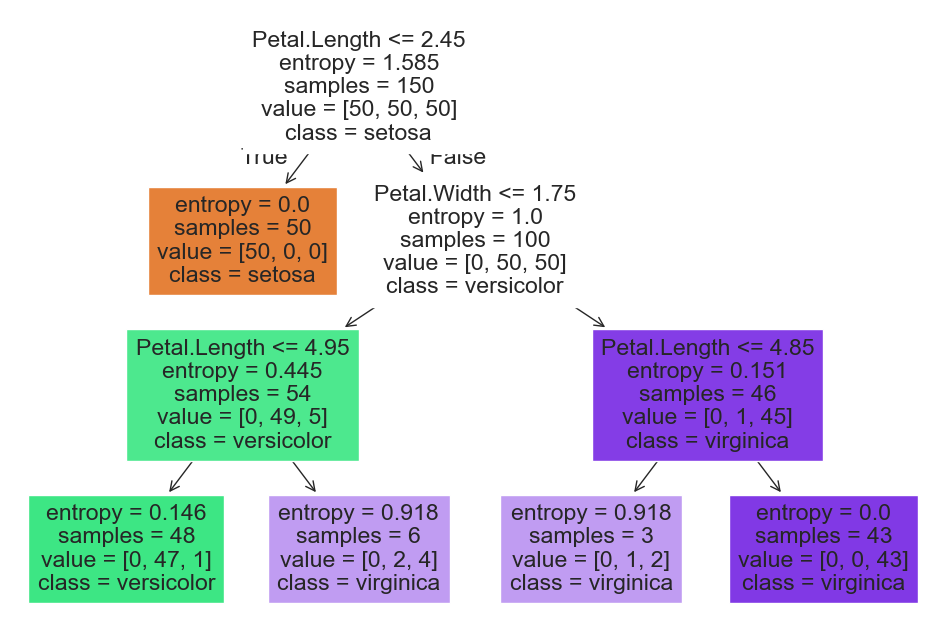

In [36]:
plt.figure(figsize=(12,8))
plot_tree(clf,filled=True, feature_names=df.columns[:-1],class_names=df["Species"].unique())
plt.show
 

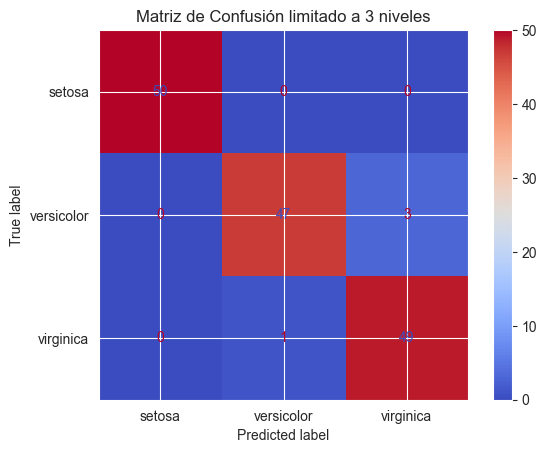

In [37]:
y_pred = clf.predict(x)
cm = confusion_matrix(y, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap="coolwarm")
plt.title("Matriz de Confusión limitado a 3 niveles")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

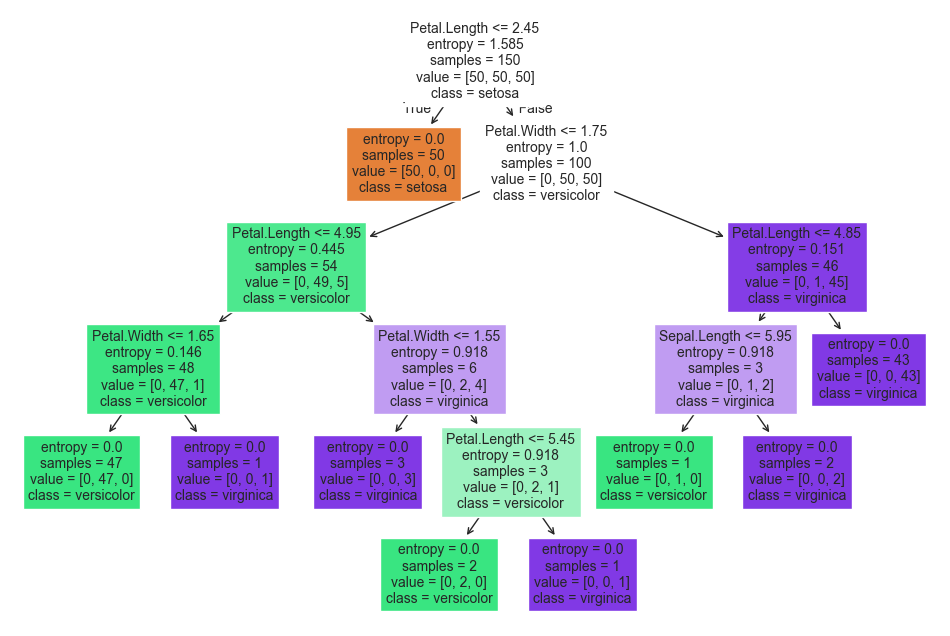

In [25]:
plt.figure(figsize=(12,8))
plot_tree(clf,filled=True, feature_names=df.columns[:-1],class_names=df["Species"].unique())
plt.show

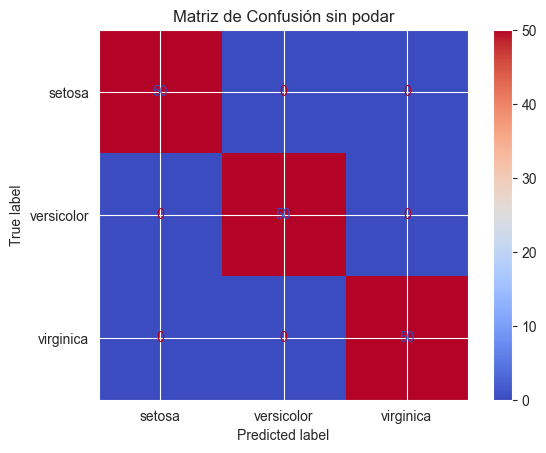

In [39]:
y_pred = clf.predict(x)
cm = confusion_matrix(y, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap="coolwarm")
plt.title("Matriz de Confusión sin podar")
plt.show()